## Data exploration for investors in Buffalo NY

This is a starter notebook with some questions and an assignment for applying python for data analysis to studying investor purcahses of homes in New York State. 
The steps here are modeled off of [this analysis for Philadelphia](https://github.com/darebrawley/tracing-speculation-philly/blob/main/01_analysis/001_investor_classification_FINAL.ipynb)

In [20]:
# import necessary python libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily
pd.set_option("display.max_columns", 150)
import datetime
import seaborn as sns
import requests
import json
import urllib

In [21]:
# import datasets for buffalo
eerie_records1217_ = pd.read_csv("data/eerie/1412_17.CSV")
eerie_records18CUR = pd.read_csv("data/eerie/1418_CUR.CSV")

/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
low_memory=False

In [23]:
# take a look at buffalo historical data
eerie_records1217_.head()

,county_name,swis_code,muni_name,muni_type,school_code,school_name,print_key,vlg_print_key,total_av,vlg_total_av,seller_last_name,seller_first_name,buyer_last_name,buyer_first_name,street_nbr,street_name,atty_last_name,atty_first_name,atty_phone,swis_county,book,page,deed_date,sale_date,sale_price,personal_prop,cod_usable,rar_usable,arms_length_flag,front,depth,total_sale_acres,nbr_of_parcels,prop_class_last_roll,prop_class_desc_last_roll,prop_class_at_sale,prop_class_desc_at_sale,grid_east,grid_north,zip5,zip4,buyer_zip5,buyer_zip4,buyer_last_name2,buyer_street_nbr,buyer_street_name,buyer_city,buyer_state,part_parcel_flag,condo_flag,ownership_code,contract_date,second_swis,new_const_flag,vlg_rar_usable,roll_yr,rps_update_flag,rps_update_date,cor_update_flag,oth_update_flag,last_fm_date,rollmatch_flag,form_recd,load_date,assessor_reviewed_flag,cond_business_sale,cond_buyer_is_seller,cond_company_sale,cond_deed_type,cond_estate,cond_govt_sale,cond_interest_conv,cond_multiple_swis,cond_other,cond_relative_sale,cond_signif_change,cond_memo,vlg_signif_change_flag
0,Erie,140200,Buffalo,2,140200.0,Buffalo,90.46-7-1,NaN,28000,0,OSAGIE,OLIVER OSAYOMORE,CHOWDHURY,"ANSAR, U.",53,MENDOLA,LOVALLO,TIMOTHY,7168541112,14,11313,8713,6/1/17,6/1/17,40000,0,Y,Y,Y,40,107,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1083155,1068189,14215.0,NaN,11216.0,NaN,NaN,1257,"BEDFORD AVE., APT #2F",BROOKLYN,NY,0,0,NaN,4/11/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/13/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
1,Erie,140200,Buffalo,2,140200.0,Buffalo,100.52-6-27,NaN,2400,0,CITY BUFFALO,NaN,HAWKINS,SEANSERRE,1400,FILLMORE,none,NaN,NaN,14,11313,8794,6/2/17,5/31/17,500,0,N,X,N,28,116,0.0,1,330.0,Vacant Land Located in Commercial Areas,330.0,Vacant Land Located in Commercial Areas,1079689,1060977,14211.0,NaN,14215.0,NaN,NaN,17,EGGERT ROAD,CHEEKTOWAGA,NY,0,0,NaN,1/1/50,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,1,0,0,0,0,0,REFEREES DEED IN REM 50 TAX FORECLOSURE SALE,0
2,Erie,140200,Buffalo,2,140200.0,Buffalo,100.49-1-8,NaN,1900,0,CITY BUFFALO,NaN,ROLLINS,BRENT,187,GLENWOOD,NaN,NaN,NaN,14,11313,8797,6/2/17,5/31/17,1,0,N,X,N,32,192,0.0,1,311.0,Residential Vacant Land,311.0,Residential Vacant Land,1074610,1061142,14208.0,NaN,14208.0,NaN,NaN,183,GLENWOOD AVE,BUFFALO,NY,0,0,NaN,3/13/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,1,0,0,0,0,0,QUIT CLAIM DEED,0
3,Erie,140200,Buffalo,2,140200.0,Buffalo,90.62-4-35,NaN,103000,0,SAREE PROPERTIES LLC,NaN,KWEB PROPERTIES LLC,NaN,139,DEERFIELD,Puleo & Puleo,NaN,7168367111,14,11313,8827,6/2/17,6/1/17,102396,0,N,N,N,31,125,0.0,3,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1083197,1066278,NaN,NaN,10472.0,NaN,NaN,310,DEERWOOD,GRAND ISLAND,NY,0,0,NaN,5/26/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,2,1,9/14/17,1,0,0,0,0,0,0,0,0,1,0,0,4 Sale Price is suspect - Sale of Contiguous P...,0
4,Erie,140200,Buffalo,2,140200.0,Buffalo,101.41-1-2,NaN,10000,0,Campbell,Staferd,Belgan One Inc,NaN,1337,E FERRY STREET,Ramos,Kristina,7168106140,14,11313,8886,6/2/17,6/1/17,1,0,N,N,N,30,122,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1086380,1061968,14211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,11/1/16,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,0,0,0,0,0,0,SALE PRICE LESS THAN $10,0


In [24]:
pd.options.display.max_rows = 10

In [25]:
buffalo = eerie_records1217_[eerie_records1217_[ 'muni_name' ] == "Buffalo" ]

In [26]:
buffalo

,county_name,swis_code,muni_name,muni_type,school_code,school_name,print_key,vlg_print_key,total_av,vlg_total_av,seller_last_name,seller_first_name,buyer_last_name,buyer_first_name,street_nbr,street_name,atty_last_name,atty_first_name,atty_phone,swis_county,book,page,deed_date,sale_date,sale_price,personal_prop,cod_usable,rar_usable,arms_length_flag,front,depth,total_sale_acres,nbr_of_parcels,prop_class_last_roll,prop_class_desc_last_roll,prop_class_at_sale,prop_class_desc_at_sale,grid_east,grid_north,zip5,zip4,buyer_zip5,buyer_zip4,buyer_last_name2,buyer_street_nbr,buyer_street_name,buyer_city,buyer_state,part_parcel_flag,condo_flag,ownership_code,contract_date,second_swis,new_const_flag,vlg_rar_usable,roll_yr,rps_update_flag,rps_update_date,cor_update_flag,oth_update_flag,last_fm_date,rollmatch_flag,form_recd,load_date,assessor_reviewed_flag,cond_business_sale,cond_buyer_is_seller,cond_company_sale,cond_deed_type,cond_estate,cond_govt_sale,cond_interest_conv,cond_multiple_swis,cond_other,cond_relative_sale,cond_signif_change,cond_memo,vlg_signif_change_flag
0,Erie,140200,Buffalo,2,140200.0,Buffalo,90.46-7-1,NaN,28000,0,OSAGIE,OLIVER OSAYOMORE,CHOWDHURY,"ANSAR, U.",53,MENDOLA,LOVALLO,TIMOTHY,7168541112,14,11313,8713,6/1/17,6/1/17,40000,0,Y,Y,Y,40,107,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1083155,1068189,14215.0,NaN,11216.0,NaN,NaN,1257,"BEDFORD AVE., APT #2F",BROOKLYN,NY,0,0,NaN,4/11/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/13/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
1,Erie,140200,Buffalo,2,140200.0,Buffalo,100.52-6-27,NaN,2400,0,CITY BUFFALO,NaN,HAWKINS,SEANSERRE,1400,FILLMORE,none,NaN,NaN,14,11313,8794,6/2/17,5/31/17,500,0,N,X,N,28,116,0.0,1,330.0,Vacant Land Located in Commercial Areas,330.0,Vacant Land Located in Commercial Areas,1079689,1060977,14211.0,NaN,14215.0,NaN,NaN,17,EGGERT ROAD,CHEEKTOWAGA,NY,0,0,NaN,1/1/50,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,1,0,0,0,0,0,REFEREES DEED IN REM 50 TAX FORECLOSURE SALE,0
2,Erie,140200,Buffalo,2,140200.0,Buffalo,100.49-1-8,NaN,1900,0,CITY BUFFALO,NaN,ROLLINS,BRENT,187,GLENWOOD,NaN,NaN,NaN,14,11313,8797,6/2/17,5/31/17,1,0,N,X,N,32,192,0.0,1,311.0,Residential Vacant Land,311.0,Residential Vacant Land,1074610,1061142,14208.0,NaN,14208.0,NaN,NaN,183,GLENWOOD AVE,BUFFALO,NY,0,0,NaN,3/13/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,1,0,0,0,0,0,QUIT CLAIM DEED,0
3,Erie,140200,Buffalo,2,140200.0,Buffalo,90.62-4-35,NaN,103000,0,SAREE PROPERTIES LLC,NaN,KWEB PROPERTIES LLC,NaN,139,DEERFIELD,Puleo & Puleo,NaN,7168367111,14,11313,8827,6/2/17,6/1/17,102396,0,N,N,N,31,125,0.0,3,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1083197,1066278,NaN,NaN,10472.0,NaN,NaN,310,DEERWOOD,GRAND ISLAND,NY,0,0,NaN,5/26/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,2,1,9/14/17,1,0,0,0,0,0,0,0,0,1,0,0,4 Sale Price is suspect - Sale of Contiguous P...,0
4,Erie,140200,Buffalo,2,140200.0,Buffalo,101.41-1-2,NaN,10000,0,Campbell,Staferd,Belgan One Inc,NaN,1337,E FERRY STREET,Ramos,Kristina,7168106140,14,11313,8886,6/2/17,6/1/17,1,0,N,N,N,30,122,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1086380,1061968,14211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,11/1/16,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,1,0,0,0,0,0,0,0,SALE PRICE LESS THAN $10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38133,Erie,140200,Buffalo,2,140200.0,Buffalo,78.82-5-16,NaN,250000,0,MEGER,MICHAELENE,CHARRY,RAYMOND JR,96,LINDEN AVE,TRASK,WILLIAM,7166486700,14,13740,2307,10/5/15,10/5/15,399900,0,Y,Y,Y,50,159,0.0,1,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1077677,1072329,14214.0,NaN,14214.0,NaN,MELOHOSK

In [27]:
armslength = buffalo[buffalo["arms_length_flag"] == "Y"]

In [28]:
armslength

,county_name,swis_code,muni_name,muni_type,school_code,school_name,print_key,vlg_print_key,total_av,vlg_total_av,seller_last_name,seller_first_name,buyer_last_name,buyer_first_name,street_nbr,street_name,atty_last_name,atty_first_name,atty_phone,swis_county,book,page,deed_date,sale_date,sale_price,personal_prop,cod_usable,rar_usable,arms_length_flag,front,depth,total_sale_acres,nbr_of_parcels,prop_class_last_roll,prop_class_desc_last_roll,prop_class_at_sale,prop_class_desc_at_sale,grid_east,grid_north,zip5,zip4,buyer_zip5,buyer_zip4,buyer_last_name2,buyer_street_nbr,buyer_street_name,buyer_city,buyer_state,part_parcel_flag,condo_flag,ownership_code,contract_date,second_swis,new_const_flag,vlg_rar_usable,roll_yr,rps_update_flag,rps_update_date,cor_update_flag,oth_update_flag,last_fm_date,rollmatch_flag,form_recd,load_date,assessor_reviewed_flag,cond_business_sale,cond_buyer_is_seller,cond_company_sale,cond_deed_type,cond_estate,cond_govt_sale,cond_interest_conv,cond_multiple_swis,cond_other,cond_relative_sale,cond_signif_change,cond_memo,vlg_signif_change_flag
0,Erie,140200,Buffalo,2,140200.0,Buffalo,90.46-7-1,NaN,28000,0,OSAGIE,OLIVER OSAYOMORE,CHOWDHURY,"ANSAR, U.",53,MENDOLA,LOVALLO,TIMOTHY,7168541112,14,11313,8713,6/1/17,6/1/17,40000,0,Y,Y,Y,40,107,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1083155,1068189,14215.0,NaN,11216.0,NaN,NaN,1257,"BEDFORD AVE., APT #2F",BROOKLYN,NY,0,0,NaN,4/11/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/13/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
6,Erie,140200,Buffalo,2,140200.0,Buffalo,77.32-4-13,NaN,104000,0,LANCHLAN,MATTHEW C,KHAN,RABIUL,19,HARTMAN,Berbary,George,7168426350,14,11313,8909,6/2/17,4/26/17,4500,0,N,N,Y,30,9766,0.0,2,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1062148,1078675,14207.0,NaN,14216.0,NaN,NaN,1853,HETEL,BUFFALO,NY,0,0,NaN,2/23/17,NaN,0,X,2017,1,3/14/18,0,1,3/14/18,2,1,9/14/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
7,Erie,140200,Buffalo,2,140200.0,Buffalo,77.32-4-13,NaN,52000,0,KHAN,RAB,ASADUZZAMAN,AFROJA,100,ULLMAN,Berbary,George,7168426350,14,11313,8913,6/2/17,6/1/17,20000,0,Y,Y,Y,30,0,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1062148,1078675,14207.0,NaN,11373.0,NaN,NaN,56 10,94TH ST APT 2E,ELMHURST,NY,0,0,NaN,1/1/50,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
11,Erie,140200,Buffalo,2,140200.0,Buffalo,100.37-7-14,NaN,100000,0,ORTH,KIMBERLY,RODRIGUEZ,JOSE R,290,ASHLAND AVENUE,Bloom,Eric,7168583831,14,11313,8986,6/2/17,6/2/17,289900,0,Y,Y,Y,26,85,0.0,1,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1069096,1061419,14222.0,NaN,14222.0,NaN,NaN,290,ASHLAND AVE,BUFFALO,NY,0,0,NaN,3/27/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
13,Erie,140200,Buffalo,2,140200.0,Buffalo,99.59-2-22,NaN,31200,0,PALOMO,AMER,208 VERMONT LLC,NaN,208,VERMONT STREET,Rooth,Walter,NaN,14,11313,9022,6/2/17,6/2/17,115000,0,Y,Y,Y,25,116,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1065875,1059270,14223.0,NaN,14223.0,NaN,NaN,21,BELMONT,TONAWANDA,NY,0,0,NaN,2/19/17,NaN,0,X,2017,1,3/14/18,0,0,3/14/18,1,1,9/14/17,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,Erie,140200,Buffalo,2,140200.0,Buffalo,90.49-5-29,NaN,54000,0,MCLAIN,RUTH,LANIER,ANTOINE,40,HEMPSTEAD AVE,BECHAKAS,STACY,7169327500,14,11585,1476,9/11/15,9/11/15,25000,0,Y,Y,Y,35,125,0.0,1,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1087032,1067986,14215.0,NaN,14051.0,NaN,NaN,NaN,PO BOX 310,E AMHERST,NY,0,0,NaN,7/22/15,NaN,0,X,2015,0,1/1/50,0,0,12/11/15,1,1,12/10/15,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
3813

In [29]:
gdf = gpd.GeoDataFrame(
    buffalo, geometry=gpd.points_from_xy(buffalo.grid_east, buffalo.grid_north))
gdf.crs = {'init' : 'EPSG:2262'}

/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
gdf.shape

(38138, 79)

<AxesSubplot:>

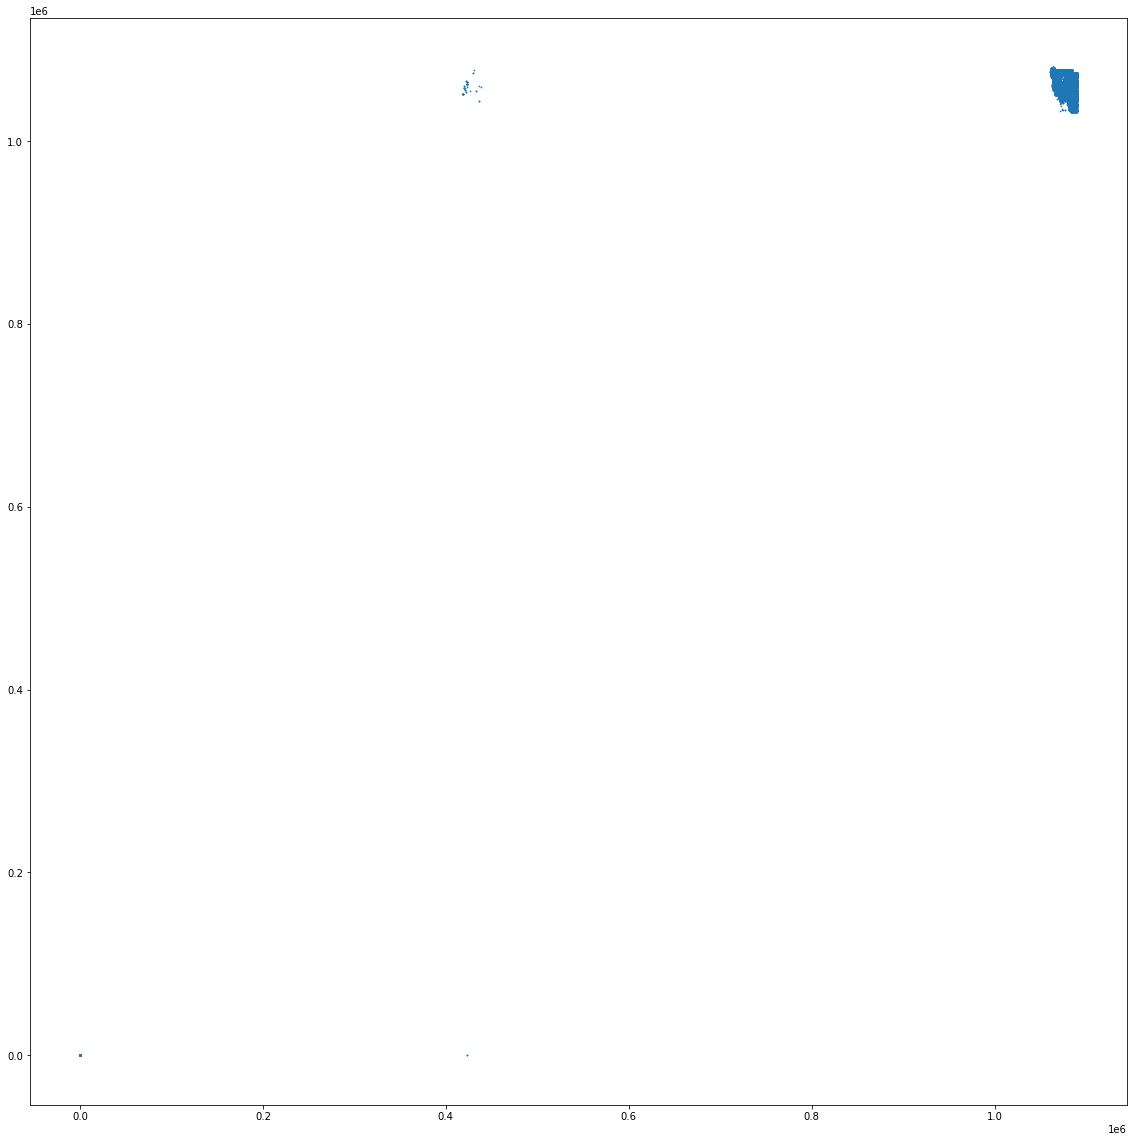

In [31]:
gdf.plot(figsize=(20,20),markersize=.5)

In [32]:
buffalo.sort_values('deed_date')

,county_name,swis_code,muni_name,muni_type,school_code,school_name,print_key,vlg_print_key,total_av,vlg_total_av,seller_last_name,seller_first_name,buyer_last_name,buyer_first_name,street_nbr,street_name,atty_last_name,atty_first_name,atty_phone,swis_county,book,page,deed_date,sale_date,sale_price,personal_prop,cod_usable,rar_usable,arms_length_flag,front,depth,total_sale_acres,nbr_of_parcels,prop_class_last_roll,prop_class_desc_last_roll,prop_class_at_sale,prop_class_desc_at_sale,grid_east,grid_north,zip5,zip4,buyer_zip5,buyer_zip4,buyer_last_name2,buyer_street_nbr,buyer_street_name,buyer_city,buyer_state,part_parcel_flag,condo_flag,ownership_code,contract_date,second_swis,new_const_flag,vlg_rar_usable,roll_yr,rps_update_flag,rps_update_date,cor_update_flag,oth_update_flag,last_fm_date,rollmatch_flag,form_recd,load_date,assessor_reviewed_flag,cond_business_sale,cond_buyer_is_seller,cond_company_sale,cond_deed_type,cond_estate,cond_govt_sale,cond_interest_conv,cond_multiple_swis,cond_other,cond_relative_sale,cond_signif_change,cond_memo,vlg_signif_change_flag,geometry
29359,Erie,140200,Buffalo,2,140200.0,Buffalo,111.37-5-6./1404,NaN,117845,0,UNIQUEST DELAWARE LLC,NaN,DINTINO,RAYMOND C.,200,DELAWARE AVENUE UNIT 1404,Dintino,Anne N,7168535100,14,11215,5005,1/10/12,1/10/12,475000,0,N,X,Y,2,217,0.0,1,411.0,Apartments,411.0,Apartments,1069352,1053059,14202.0,NaN,14226.0,NaN,DINTINO,389,MT VERNON,AMHERST,NY,0,1,C,11/19/11,NaN,0,X,2011,1,9/26/12,0,0,9/28/12,1,0,3/15/12,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,POINT (1069352.000 1053059.000)
29355,Erie,140200,Buffalo,2,140200.0,Buffalo,89.44-9-14,NaN,3400,0,CITY OF BUFFALO,NaN,BHATTI,MUHAMMAD,2224,FILLMORE,NaN,NaN,NaN,14,11215,4858,1/10/12,1/6/12,500,0,N,X,N,35,120,0.0,1,220.0,Two Family Year-Round Residence,311.0,Residential Vacant Land,1079671,1069289,14214.0,NaN,11421.0,NaN,NaN,80-23,87TH ROAD,WOODHAVEN,NY,0,0,NaN,1/1/50,NaN,0,X,2011,1,5/21/12,0,0,5/21/12,1,1,3/19/12,1,0,0,0,1,0,1,0,0,0,0,0,REFEREES DEED IN REM 45 TAX FORCLOSURER SALE,0,POINT (1079671.000 1069289.000)
29354,Erie,140200,Buffalo,2,140200.0,Buffalo,90.46-1-21,NaN,18300,0,MORGAN,MARQUIEL,HAYNES,TONIKA,25,HIII ST,NaN,NaN,NaN,14,11215,4855,1/10/12,1/10/12,3000,0,N,N,N,30,131,0.0,1,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,1081880,1068959,14214.0,NaN,14214.0,NaN,NaN,25,HILL ST,BUFFALO,NY,0,0,NaN,1/1/50,NaN,0,X,2011,1,5/21/12,0,0,5/21/12,1,1,3/19/12,1,0,0,0,1,0,0,0,0,0,0,0,NaN,0,POINT (1081880.000 1068959.000)
29353,Erie,140200,Buffalo,2,140200.0,Buffalo,133.32-2-8,NaN,48400,0,KELLY,KEVIN,BENAS,LOUIS,129,KENEFIC,Musana,Molly,7168567330,14,11215,4839,1/10/12,7/15/11,12000,0,N,N,N,30,112,0.0,1,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1085105,1038916,14220.0,NaN,14220.0,NaN,NaN,106,BLOOMFIELD,BUFFALO,NY,0,0,NaN,5/24/11,NaN,0,X,2011,1,5/21/12,0,0,5/21/12,1,1,3/19/12,1,0,0,0,1,0,0,0,0,0,0,0,NaN,0,POINT (1085105.000 1038916.000)
29352,Erie,140200,Buffalo,2,140200.0,Buffalo,133.71-5-8,NaN,67800,0,Pernatt,Eugene,Pernatt,Wesley,49,CANTWELL DR,Smith,Jamie,7162041055,14,11215,4815,1/10/12,12/30/11,1,0,N,N,N,35,105,0.0,1,210.0,One Family Year-Round Residence,210.0,One Family Year-Round Residence,1084292,1033142,14220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,1/1/50,NaN,0,X,2011,1,5/21/12,0,0,5/21/12,1,1,3/19/12,1,0,0,0,1,0,0,0,0,0,1,0,QUIT CLAIM DEED,0,POINT (1084292.000 1033142.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27172,Erie,140200,Buffalo,2,140200.0,Buffalo,90.74-4-23,NaN,69200,0,BOBB,MARY LOU,HOSSAIN,DEWAN M.,162 AND 16,HAZELWOOD,Piasecki,Brandon,7166934792,14,11301,6671,9/9/16,9/9/16,30000,0,N,N,N,62,126,0.0,2,220.0,Two Family Year-Round Residence,220.0,Two Family Year-Round Residence,108862

In [33]:
year = buffalo[["deed_date"]]

In [34]:
print(year)

      deed_date
0        6/1/17
1        6/2/17
2        6/2/17
3        6/2/17
4        6/2/17
...         ...
38133   10/5/15
38134   4/28/16
38135   1/26/17
38136   10/6/16
38137    3/8/13

[38138 rows x 1 columns]


In [35]:
year.sort_values(by='deed_date')

,deed_date
29359,1/10/12
29355,1/10/12
29354,1/10/12
29353,1/10/12
29352,1/10/12
...,...
27172,9/9/16
27173,9/9/16
27174,9/9/16
27176,9/9/16


In [42]:
year['deed_date'] = pd.to_datetime(year['deed_date'], format ='%m/%d/%y')


/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
print(year)

       deed_date
0     2017-06-01
1     2017-06-02
2     2017-06-02
3     2017-06-02
4     2017-06-02
...          ...
38133 2015-10-05
38134 2016-04-28
38135 2017-01-26
38136 2016-10-06
38137 2013-03-08

[38138 rows x 1 columns]


In [59]:
year_grouped = year.groupby(year.deed_date.dt.year)

deed_date
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

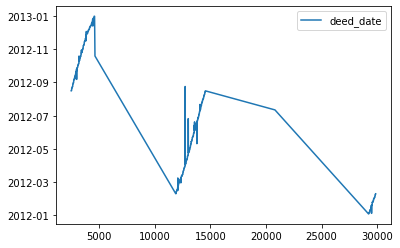

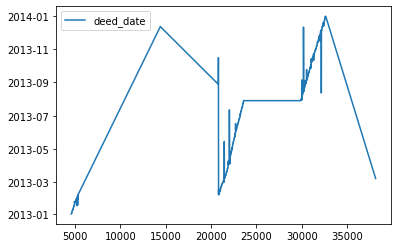

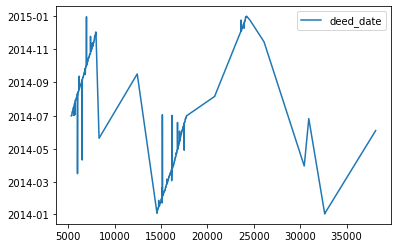

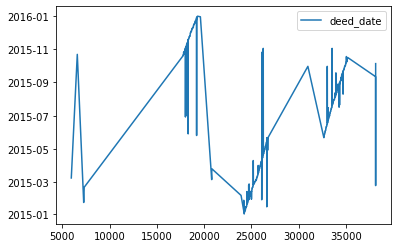

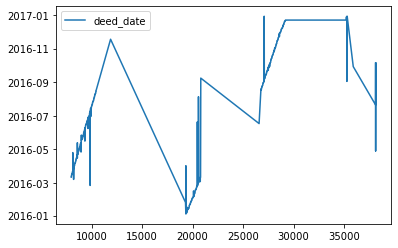

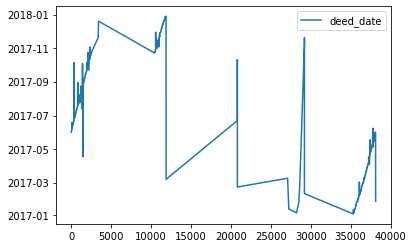

In [57]:
year_grouped.plot()

In [36]:
#can't figure out how to group and plot that dates

In [37]:
investors = buffalo['buyer_last_name'].str.contains(
    'LLC|LP|LIMITED PARTNERSHIP|CORP|CORPORATION|INC|COMPANY|LIMITED PARTNE|L P|L L C|PARTNERSHIP|LTD|TRUST'
    ,regex=True)

In [38]:
print(investors)

0        False
1        False
2        False
3         True
4        False
         ...  
38133    False
38134    False
38135    False
38136     True
38137    False
Name: buyer_last_name, Length: 38138, dtype: object


In [183]:
#can't figure out how to apply "0" and "1" values in new column

# A few assignments:

## Practice filtering

Filter the eerie records dataframe to find all records for the City of Buffalo. Look at the data dictionary saved [here](https://drive.google.com/open?id=16ZS0uJ64wjoiGKTHL0lmO3uNX1ma6XVd&authuser=db2672%40columbia.edu&usp=drive_fs) for info about how to interpret the columns in the dataset. 


## Ditermine deed types

Ditermine whether there are multiple types of real estate transactions represented in the dataset. Filter to select just Arms Length Sale deeds

## Geolocate deeds based on grid coordinates

Use the `grid_east` and `grid_north` columns to create coordinates and then a geodataframe.  
See [this post for creating point geometry from xy coordinates](https://geopandas.org/gallery/create_geopandas_from_pandas.html).  
Be sure to set the coordinate reference system as EPSG: 2262 (State Plane New York West).  

## Plot deeds by year
Create a chart showing total number of deeds per year. 

## Tag grantees who use LLC or other corporate name

Follow method used [here](https://github.com/darebrawley/tracing-speculation-philly/blob/main/01_analysis/001_investor_classification_FINAL.ipynb). Add a column where you place a 1 or a 0 based on whether the grantee name includes LLC or other common corporate entities

In [ ]:
# this is a slight change to be able to update the repository